<a href="https://colab.research.google.com/github/anhtruong1209/Deep-Learning/blob/master/Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
!pip install tensorflow-gpu==2.0.rc

     |████████████████████████████████| 380.5MB 48kB/s 
     |████████████████████████████████| 501kB 47.0MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 4.3MB 42.4MB/s 


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Traffic/Traffic.ipynb


[Errno 20] Not a directory: '/content/drive/MyDrive/Colab Notebooks/Traffic/Traffic.ipynb'
/content


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Traffic

/content/drive/MyDrive/Colab Notebooks/Traffic


In [ ]:

data = "./"
training_link = data+ "train.p"
valid_link = data +"valid.p"
test_link = data + "test.p"

In [ ]:

import pickle

In [ ]:


with open(training_link, mode = "rb" ) as f:
    train = pickle.load(f)
with open(valid_link, mode = "rb" ) as f:
    valid = pickle.load(f)
with open(test_link, mode = "rb" ) as f:
    test = pickle.load(f)        

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
trainX = train["features"]
trainY = train["labels"]

validX = valid["features"]
validY = valid["labels"]

testX = test["features"]
testY = test["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
classNames[trainY[50]]

'End of no passing'

In [ ]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
trainX

array([[[[0.10980392, 0.09803922, 0.09411765],
         [0.10588235, 0.09411765, 0.09019608],
         [0.10588235, 0.09411765, 0.08627451],
         ...,
         [0.1254902 , 0.10980392, 0.09411765],
         [0.12156863, 0.10588235, 0.09803922],
         [0.12156863, 0.10588235, 0.10196078]],

        [[0.11372549, 0.10196078, 0.09803922],
         [0.10588235, 0.09803922, 0.09019608],
         [0.10588235, 0.09803922, 0.09019608],
         ...,
         [0.1254902 , 0.10980392, 0.09411765],
         [0.12156863, 0.10588235, 0.09411765],
         [0.11764706, 0.10588235, 0.09803922]],

        [[0.10980392, 0.10196078, 0.10196078],
         [0.10588235, 0.09803922, 0.09019608],
         [0.10196078, 0.09803922, 0.09019608],
         ...,
         [0.1254902 , 0.10980392, 0.09411765],
         [0.12156863, 0.10588235, 0.09411765],
         [0.11764706, 0.10588235, 0.09803922]],

        ...,

        [[0.10588235, 0.09411765, 0.09019608],
         [0.10980392, 0.09803922, 0.09411765]

In [ ]:
from sklearn.preprocessing import  LabelBinarizer
lb = LabelBinarizer()

In [ ]:
trainY = lb.fit_transform(trainY)

In [ ]:
validY = lb.fit_transform(validY)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
width = 32
height = 32
classes = 43

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(classes))
model.add(Activation("softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.1 

In [ ]:
epochs = 10
batch_size = 64

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)


In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10
543/543 [==============================] - 45s 83ms/step - loss: 2.9838 - accuracy: 0.2244 - val_loss: 7.5117 - val_accuracy: 0.0628
Epoch 2/10
543/543 [==============================] - 44s 82ms/step - loss: 1.7381 - accuracy: 0.4517 - val_loss: 2.0626 - val_accuracy: 0.4288
Epoch 3/10
543/543 [==============================] - 44s 82ms/step - loss: 1.1291 - accuracy: 0.6199 - val_loss: 1.4848 - val_accuracy: 0.5694
Epoch 4/10
543/543 [==============================] - 45s 82ms/step - loss: 0.7332 - accuracy: 0.7484 - val_loss: 1.3064 - val_accuracy: 0.6429
Epoch 5/10
543/543 [==============================] - 44s 82ms/step - loss: 0.5139 - accuracy: 0.8260 - val_loss: 1.2255 - val_accuracy: 0.7063
Epoch 6/10
543/543 [==============================] - 44s 82ms/step - loss: 0.3693 - accuracy: 0.8759 - val_loss: 1.1759 - val_accuracy: 0.7122
Epoch 7/10
543/543 [==============================] - 45s 82ms/step - loss: 0.2672 - accuracy: 0.9097 - val_loss: 1.1865 

In [ ]:
model.save("traffic.h5")

In [ ]:
saved_model = tf.keras.models.load_model("traffic.h5")
result = saved_model.predict(testX[80:81])

In [ ]:
result

array([[3.1823010e-08, 3.9570699e-12, 4.1821341e-10, 1.2346980e-17,
        7.9452125e-11, 2.0467313e-12, 1.4166337e-13, 6.6948705e-14,
        1.9903289e-11, 1.0541157e-08, 1.1035940e-08, 8.8689558e-05,
        1.3201343e-15, 3.5836681e-15, 1.9642428e-11, 4.2400433e-14,
        8.2688949e-09, 2.2983023e-08, 5.1121611e-07, 1.3125166e-02,
        3.5645269e-05, 7.5892264e-01, 3.3790045e-08, 6.7799841e-03,
        1.5839349e-07, 2.4912886e-08, 9.5820988e-06, 2.2024785e-01,
        1.3987958e-06, 3.4014491e-08, 6.6024013e-06, 5.0745434e-06,
        1.1247052e-13, 2.7560949e-09, 7.1313129e-11, 9.8255519e-09,
        3.5399773e-12, 9.1635016e-08, 7.5481366e-04, 2.1478414e-05,
        8.3256948e-09, 9.9012968e-12, 1.3143257e-11]], dtype=float32)

In [ ]:
import numpy as np


In [ ]:
#timf ra cho co xac suat lon nhat 
final = np.argmax(result)

In [ ]:
#mapping den class

final = classNames[final]

In [ ]:
final

'Double curve'

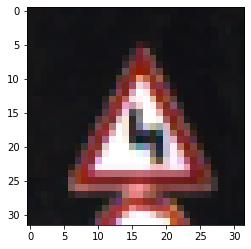

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(test["features"][80])

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')